<a href="https://colab.research.google.com/github/lilianaochoae/VENTAS_FARMACEUTICAS_ATC/blob/main/MESES_FINAL_VENTAS_FARMACEUTICAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTACIÓN DE LIBRERÍA

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

CARGADE BASE DE DATOS

In [30]:
columns_dtypes = {'M01AB' : 'category',
                  'M01AE' : 'category',
                  'N02BA' : 'category',
                  'N02BE' : 'category',
                  'N05B' : 'category',
                  'N05C' : 'category',
                  'R03' : 'category',
                  'R06' : 'category'}

In [31]:
Bd = pd.read_csv("salesmonthly1.csv", sep=';', encoding='latin-1', dtype=columns_dtypes)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,dia,mes,año
0,12769000000000000,9909000000000000,15209999999999900,8780300000000000,354.0,50.0,112.0,48.2,31,1,2014
1,133.32,1260500000000000,17699999999999900,10019000000000000,347.0,31.0,122.0,36.2,28,2,2014
2,13744000000000000,9295000000000000,147655,779275,232.0,20.0,112.0,85.4,31,3,2014
3,11310000000000000,8947500000000000,13089999999999900,698.5,209.0,18.0,97.0,73.7,30,4,2014
4,10179000000000000,11993300000000000,132.1,6287800000000000,270.0,23.0,107.0,12369999999999900,31,5,2014


In [32]:
print (Bd.shape)

(70, 11)


El dataset contiene 50532 observaciones y 13 columnas

PORCENTAJE DE VALORES FALTANTES EN COLUMNAS

In [33]:
k = Bd.isna().sum()
((round(k[k!=0]/Bd.shape[0], 2) * 100).astype(int)).astype(str).str.cat(['' for i in range(len(k[k!=0]))], sep='%')

Series([], dtype: object)

In [34]:
base = Bd

LIMPIEZA DE LOS DATOS

In [35]:
#HotEncoding en la variable dia
dummy_dia = pd.get_dummies(Bd["dia"], prefix = "dia")
dummy_dia.head()

#Agregar el HotEncoding de DIA a la BD
Bd = Bd.drop(["dia"], axis = 1)
Bd = pd.concat([Bd,dummy_dia], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mes,año,dia_28,dia_29,dia_30,dia_31
0,12769000000000000,9909000000000000,15209999999999900,8780300000000000,354.0,50.0,112.0,48.2,1,2014,0,0,0,1
1,133.32,1260500000000000,17699999999999900,10019000000000000,347.0,31.0,122.0,36.2,2,2014,1,0,0,0
2,13744000000000000,9295000000000000,147655,779275,232.0,20.0,112.0,85.4,3,2014,0,0,0,1
3,11310000000000000,8947500000000000,13089999999999900,698.5,209.0,18.0,97.0,73.7,4,2014,0,0,1,0
4,10179000000000000,11993300000000000,132.1,6287800000000000,270.0,23.0,107.0,12369999999999900,5,2014,0,0,0,1


In [36]:
#HotEncoding en la variable mes	
dummy_mes	= pd.get_dummies(Bd["mes"], prefix = "mes")
dummy_mes.head()

#Agregar el HotEncoding de mes a la BD
Bd = Bd.drop(["mes"], axis = 1)
Bd = pd.concat([Bd,dummy_mes], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,año,dia_28,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
0,12769000000000000,9909000000000000,15209999999999900,8780300000000000,354.0,50.0,112.0,48.2,2014,0,...,0,0,0,0,0,0,0,0,0,0
1,133.32,1260500000000000,17699999999999900,10019000000000000,347.0,31.0,122.0,36.2,2014,1,...,0,0,0,0,0,0,0,0,0,0
2,13744000000000000,9295000000000000,147655,779275,232.0,20.0,112.0,85.4,2014,0,...,1,0,0,0,0,0,0,0,0,0
3,11310000000000000,8947500000000000,13089999999999900,698.5,209.0,18.0,97.0,73.7,2014,0,...,0,1,0,0,0,0,0,0,0,0
4,10179000000000000,11993300000000000,132.1,6287800000000000,270.0,23.0,107.0,12369999999999900,2014,0,...,0,0,1,0,0,0,0,0,0,0


VALIDACIÓN DE DATOS

Generalmente, cuando trabajemos con algoritmos de clustering, dado que son algoritmos basados en distancias, va a ser fundamental escalar los datos para prescindir de las unidades de medida de las diferentes features. A continuación, escalamos los datos numéricos:

In [37]:
from sklearn.preprocessing import scale, MinMaxScaler

# scale
scaled_1 = scale(Bd)

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(Bd)

# Muestro las primeras 5 filas escaladas con scale
print("Escalado con scale:")
print(scaled_1[1:5,])

# Muestro las primeras 5 filas escaladas con Min-Max
print("\nEscalado con Min-Max:")
print(scaled_2[1:5,])

Escalado con scale:
[[-1.46310186 -1.45695096  1.92132504  0.36042171 -0.24579619  1.56252364
  -0.56262596 -0.4253055  -1.4471361   3.60555128 -0.12038585 -0.69954392
  -1.18903032 -0.30618622  3.26598632 -0.30618622 -0.30618622 -0.30618622
  -0.30618622 -0.30618622 -0.30618622 -0.30618622 -0.30618622 -0.2773501
  -0.2773501 ]
 [ 0.23607581  0.08180005 -0.91997755 -0.95754812 -0.24579619  0.25617923
  -0.68580624 -0.4253055  -1.4471361  -0.2773501  -0.12038585 -0.69954392
   0.84102145 -0.30618622 -0.30618622  3.26598632 -0.30618622 -0.30618622
  -0.30618622 -0.30618622 -0.30618622 -0.30618622 -0.30618622 -0.2773501
  -0.2773501 ]
 [-0.06484084  0.01524757  1.18130217 -0.95754812 -0.24579619  0.01866206
  -0.87057667 -0.4253055  -1.4471361  -0.2773501  -0.12038585  1.4295028
  -1.18903032 -0.30618622 -0.30618622 -0.30618622  3.26598632 -0.30618622
  -0.30618622 -0.30618622 -0.30618622 -0.30618622 -0.30618622 -0.2773501
  -0.2773501 ]
 [-0.20466695  0.59857295 -0.91997755 -0.13040662 -

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


ALGORITMO K-MEANS

In [38]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=4, init='random',
    n_init=6, random_state=0
)

In [39]:
y_km = km.fit_predict(scaled_1)

In [40]:
print(y_km)

[2 0 2 1 3 1 3 3 1 2 1 2 2 0 2 1 3 1 3 3 1 2 1 2 2 0 2 1 2 1 3 3 1 2 1 2 3
 0 2 1 3 1 3 3 1 2 1 2 2 0 2 1 2 1 3 3 1 2 1 2 2 0 2 1 2 1 3 3 1 2]


GRAFICAR

Para graficar los clústeres, utilizamos Matplotlib. La mejor forma de ver como se comportan los datos es con un gráfico de dispersión (scatter)

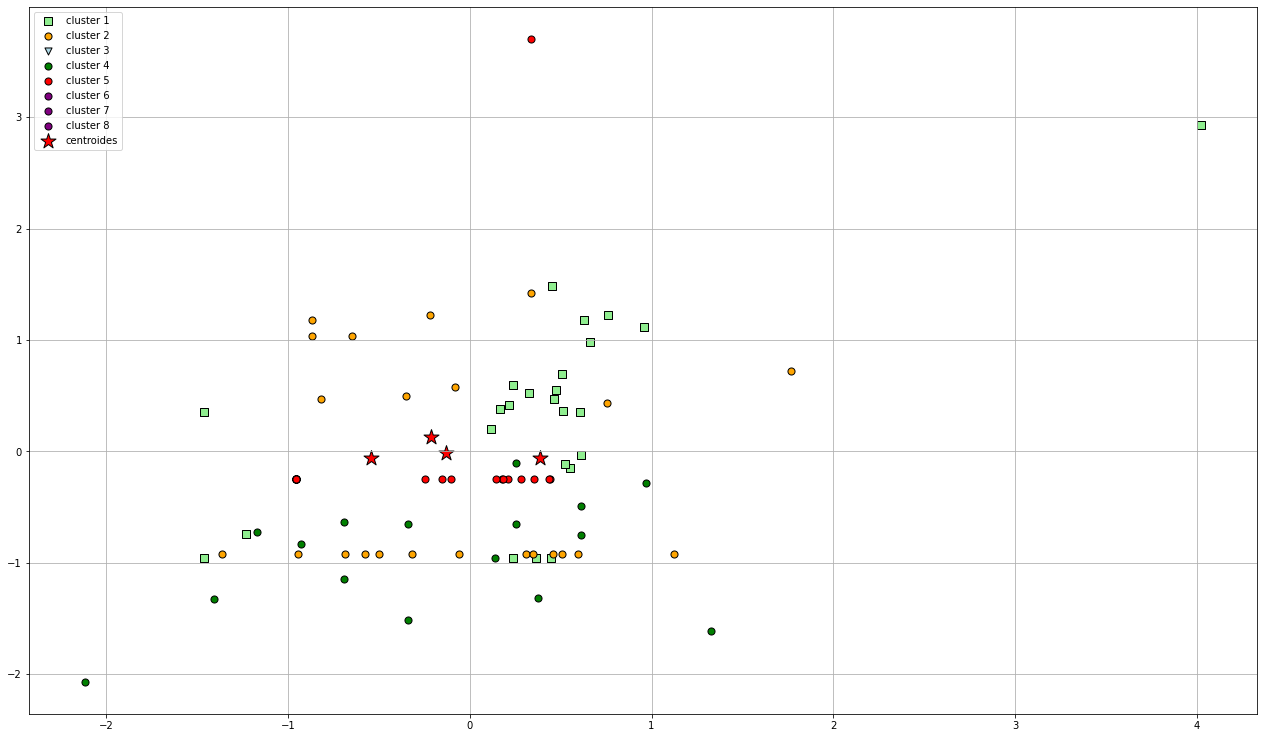

In [41]:
import matplotlib.pyplot as plt

#configuro el tamaño del grafico final
plt.figure(figsize=(22,13))

#scatter del primer cluster
plt.scatter(
    scaled_1[y_km == 2, 0], scaled_1[y_km == 2, 3],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
#scatter del segundo cluster
plt.scatter(
    scaled_1[y_km == 1, 6], scaled_1[y_km == 1, 2],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
#scatter del tercer cluster
plt.scatter(
    scaled_1[y_km == 4, 7], scaled_1[y_km == 4, 7],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
#scatter del cuarto cluster
plt.scatter(
    scaled_1[y_km == 3, 5], scaled_1[y_km == 3, 6],
    s=50, c='green',
    marker='o', edgecolor='black',
    label='cluster 4'
)
#scatter del quinto cluster
plt.scatter(
    scaled_1[y_km == 1, 3], scaled_1[y_km == 1, 4],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 5'
)
#scatter del sexto cluster
plt.scatter(
    scaled_1[y_km == 4, 6], scaled_1[y_km == 4, 6],
    s=50, c='purple',
    marker='o', edgecolor='black',
    label='cluster 6'
)

#scatter del septimo cluster
plt.scatter(
    scaled_1[y_km == 6, 4], scaled_1[y_km == 4, 6],
    s=50, c='purple',
    marker='o', edgecolor='black',
    label='cluster 7'
)

#scatter del sexto cluster
plt.scatter(
    scaled_1[y_km == 6, 1], scaled_1[y_km == 5, 6],
    s=50, c='purple',
    marker='o', edgecolor='black',
    label='cluster 8'
)


#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)
#le pongo la leyenda
plt.legend(scatterpoints=1)
#hace una grilla en el grafico
plt.grid()
#lo imprime en pantalla
plt.show()

MÉTRICAS DE EVALUACIÓN


El método de Elbow consiste básicamente en verificar la evolución de la suma de los cuadrados del error para varios valores de K y verificar cual es el que brinda un mejor agrupamiento.

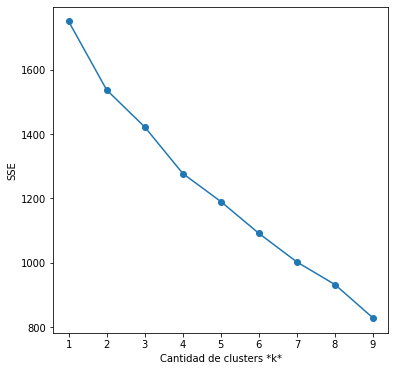

In [42]:
# Se corre el algoritmo con K entre 2 y 10 y se va guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_1)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

In [43]:
clases = km.labels_

In [44]:
clases.shape

(70,)

In [45]:
print(clases)

[8 3 0 1 4 1 5 0 1 7 6 2 8 3 0 1 4 1 5 0 1 7 6 2 8 3 0 1 4 1 5 0 1 7 6 2 8
 3 0 1 4 1 5 0 1 7 6 2 8 3 0 1 4 1 5 0 1 7 6 2 8 3 0 1 4 1 5 0 1 7]


ALGORITMO DE CLASIFICACIÓN

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
datos_Bd_variables = Bd

In [48]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(datos_Bd_variables, clases, random_state=1)

In [ ]:
print("Tamaño de los datos de entrenamiento = ", X_entrenamiento.shape)
print("Tamaño de los datos de prueba = ", X_prueba.shape)
print("Tamaño del vector de clases de entrenamiento = " , y_entrenamiento.shape)
print("Tamaño del vector de clases de prueba = ", y_prueba.shape)

In [50]:
# Cargar librerias
from sklearn.ensemble import AdaBoostClassifier
# Importar Clasificador de Vector de Soporte
from sklearn.svm import SVC
# Importar métricas scikit-learn para calculos exactos
from sklearn import metrics

In [51]:
# Crear clasificador base
svc = SVC(probability=True, kernel='linear')

# Crear objeto de clasificación AdaBoost
abc = AdaBoostClassifier(n_estimators=2500,learning_rate=0.001)

# Clasificador de entrenamiento AdaBoost
model = abc.fit(X_entrenamiento, y_entrenamiento)

# Predicción de la respuesta para la bd de prueba
y_pred = model.predict(X_prueba)

# Exactitud del modelo, qué tan correcto es el clasificador?
print("Accuracy:",metrics.accuracy_score(y_prueba, y_pred))

Accuracy: 1.0
